# Testing PEC and ZNE on noisy quantum computers

**Description**

Runs various error mitigation techniques (ZNE and PEC) on a noisy simulator using GHZ benchmark circuits.

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import cirq

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeJakartaV2 as FakeJakarta

from mitiq import zne, pec
from mitiq.zne.scaling import fold_global, fold_all, fold_gates_at_random
from mitiq.zne.inference import RichardsonFactory, LinearFactory, PolyFactory
from mitiq.pec import execute_with_pec, OperationRepresentation


## Setup

## Parameters

In [3]:
shots = 10000
depths = [1, 2, 3]
scale_sets = [[1.0, 2.0], [1.0, 2.0, 3.0], [1.0, 1.5, 2.0, 2.5, 3.0]]
folding_methods = [fold_global, fold_all, fold_gates_at_random]
factory_constructors = [
    lambda s: RichardsonFactory(scale_factors=s),
    lambda s: LinearFactory(scale_factors=[s[0], s[-1]]),
    lambda s: PolyFactory(scale_factors=s, order=min(2, len(s)-1))
]
pec_samples = [500, 1000]
noisy_backend = FakeJakarta()
ideal_backend = AerSimulator()

## GHZ Circuit Generator

In [4]:
def generate_ghz_with_depth(n_qubits, depth):
    circuit = QuantumCircuit(n_qubits)
    circuit.h(0)
    for d in range(depth):
        for i in range(n_qubits - 1):
            circuit.cx(i, i + 1)
    return circuit

## Executor

In [5]:
def execute_noisy_expectation(circuit, backend=noisy_backend, shots=shots):
    # Append measurement gates
    circuit_to_run = circuit.copy()
    circuit_to_run.measure_all()
    compiled = transpile(circuit_to_run, backend)
    result = backend.run(compiled, shots=shots).result()
    counts = result.get_counts(circuit_to_run)
    #noisy_expectation_value = (noisy_counts[n_qubits * "0"] + noisy_counts[n_qubits * "1"])/ shots

    all_zero = '0' * circuit_to_run.num_qubits
    all_one = '1' * circuit_to_run.num_qubits
    return (counts.get(all_zero, 0) + counts.get(all_one, 0)) / shots

In [ ]:
def execute_ideal_backend(circuit):
    ideal_backend = AerSimulator()

    # Append measurement gates
    circuit_to_run = circuit.copy()
    circuit_to_run.measure_all()

    #######################################

    # TODO: Run circuit_to_run on the ideal backend and get the ideal counts
    ideal_result = ideal_backend.run(circuit_to_run, shots=shots).result()
    ideal_counts = ideal_result.get_counts(circuit_to_run)

    #######################################


   # plot_histogram(ideal_counts, title='Counts for an ideal GHZ state')
    return ideal_result,ideal_counts

In [10]:
# Run the simulation on the noisy backend
def execute_noisy_expectation_plt(circuit_to_run,shots,n_qubits):
#######################################

    # TODO: Run circuit_to_run on the noisy backend and get the noisy counts
   # noisy_result = noisy_backend.run(circuit_to_run, shots=shots).result()
    #noisy_counts = noisy_result.get_counts(circuit_to_run)
    #print("Executing a circuit of depth:", compiled_circuit.depth())
    ######################################
    
    # TODO: cope and paste the instructions that we previously used to obtain noisy <A>.
    noisy_result = noisy_backend.run(circuit_to_run, shots=shots).result()
    noisy_counts = noisy_result.get_counts(circuit_to_run)
    noisy_expectation_value = (noisy_counts[n_qubits * "0"] + noisy_counts[n_qubits * "1"])/ shots
    #######################################
    #plot_histogram(noisy_counts, title='Counts for a noisy GHZ state', figsize=(15, 5))
    return noisy_counts,noisy_result

In [11]:
def compareid_noisy(ideal_counts, noisy_counts, n_qubits,shots):
    ideal_expectation_value = (ideal_counts[n_qubits * "0"]+ ideal_counts[n_qubits * "1"])/ shots # TODO: get <A> from ideal_counts
    print(f"The ideal expectation value is <A> = {ideal_expectation_value}")

    noisy_expectation_value = (noisy_counts[n_qubits * "0"] + noisy_counts[n_qubits * "1"])/ shots # TODO: get <A> from noisy_counts
    print(f"The noisy expectation value is <A> = {noisy_expectation_value}")

In [12]:
def execute(compiled_circuit,n_qubits,circuit_to_run):
    """Executes the input circuits and returns the expectation value of A=|00..0><00..0| + |11..1><11..1|."""
    print("Executing a circuit of depth:", compiled_circuit.depth())
    ######################################
    
    # TODO: cope and paste the instructions that we previously used to obtain noisy <A>.
    noisy_result = noisy_backend.run(circuit_to_run, shots=shots).result()
    noisy_counts = noisy_result.get_counts(circuit_to_run)
    noisy_expectation_value = (noisy_counts[n_qubits * "0"] + noisy_counts[n_qubits * "1"])/ shots

    #######################################

    return noisy_expectation_value

In [ ]:
#print(f"The noisy expectation value is <A> = {execute(compiled_circuit)}")

In [14]:
from mitiq import zne

#zne_value = zne.execute_with_zne(
 #   circuit= compiled_circuit, # TODO... docs: https://mitiq.readthedocs.io/en/stable/apidoc.html#module-mitiq.zne.zne
  #  executor= execute # TODO...
#)
                                
#print(f"The error mitigated expectation value is <A> = {zne_value}")

In [15]:
noisy_backend = FakeJakarta() # QPU emulator

# Compile the circuit into the native gates of the backend
#compiled_circuit = transpile(circuit_to_run, noisy_backend)

In [16]:
def execute_noisy_expectation(circuit_to_run, backend=noisy_backend, shots=shots):
    compiled_circuit=circuit_to_run
    """Executes the input circuits and returns the expectation value of A=|00..0><00..0| + |11..1><11..1|."""
    print("Executing a circuit of depth:", compiled_circuit.depth())
    ######################################
    
    # TODO: cope and paste the instructions that we previously used to obtain noisy <A>.
    noisy_result = noisy_backend.run(circuit_to_run, shots=shots).result()
    noisy_counts = noisy_result.get_counts(circuit_to_run)
    noisy_expectation_value = (noisy_counts[n_qubits * "0"] + noisy_counts[n_qubits * "1"])/ shots

    #######################################

    return noisy_expectation_value

## Run ZNE Experiment

In [ ]:
results = []
'''for depth in depths:
    circuit = generate_ghz_with_depth(5, depth)
    transpiled = transpile(circuit, backend=noisy_backend)
    for scale_factors in scale_sets:
        for fold in folding_methods:
            for factory_fn in factory_constructors:
                factory = factory_fn(scale_factors)
                folded_circs = [fold(transpiled, s) for s in scale_factors]
                evals = [execute_noisy_expectation(c) for c in folded_circs]
                for s, val in zip(scale_factors, evals):
                    factory.push({'scale_factor': s}, val)
                try:
                    zne_val = factory.reduce()
                    results.append({
                        'method': 'ZNE',
                        'depth': depth,
                        'folding': fold.__name__,
                        'factory': type(factory).__name__,
                        'scale_factors': str(scale_factors),
                        'mitigated_value': zne_val
                    })
                except Exception as e:
                    print(f'ZNE failed at depth {depth}:', e)'''

In [ ]:
# Run the simulation on the noisy backend
from qiskit.visualization import plot_histogram

def execute_noisy_expectation_plt(circuit_to_run,shots,n_qubits):
#######################################

   
    ######################################
    
    # TODO: cope and paste the instructions that we previously used to obtain noisy <A>.
    noisy_result = noisy_backend.run(circuit_to_run, shots=shots).result()
    noisy_counts = noisy_result.get_counts(circuit_to_run)
    noisy_expectation_value = (noisy_counts[n_qubits * "0"] + noisy_counts[n_qubits * "1"])/ shots
    #######################################
    plot_histogram(noisy_counts, title='Counts for a noisy GHZ state', figsize=(15, 5))
    return [noisy_counts,noisy_result,circuit_to_run.depth()]

In [ ]:
from functools import partial
from qiskit.visualization import plot_histogram

# Noisy execution function with plotting
def execute_noisy_expectation_plt(circuit_to_run, shots, n_qubits):
    noisy_result = noisy_backend.run(circuit_to_run, shots=shots).result()
    noisy_counts = noisy_result.get_counts(circuit_to_run)
    noisy_expectation_value = (noisy_counts.get(n_qubits * "0", 0) + 
                               noisy_counts.get(n_qubits * "1", 0)) / shots
    plot_histogram(noisy_counts, title='Counts for a noisy GHZ state', figsize=(15, 5))
    return noisy_expectation_value

# Define ZNE loop
from mitiq.benchmarks import generate_ghz_circuit
from mitiq.zne import execute_with_zne
from mitiq.zne.scaling import fold_global, fold_all, fold_gates_at_random
from mitiq.zne.inference import RichardsonFactory, LinearFactory, PolyFactory
import pandas as pd
from qiskit import transpile

qubit_counts = [3, 5]
scale_sets = [
    [1.0, 2.0],
    [1.0, 2.0, 3.0],
    [1.0, 1.5, 2.0, 2.5, 3.0]
]
folding_methods = [fold_global, fold_all, fold_gates_at_random]
factory_constructors = [
    lambda s: RichardsonFactory(scale_factors=s),
    lambda s: LinearFactory(scale_factors=[s[0], s[-1]]),
    lambda s: PolyFactory(scale_factors=s, order=min(2, len(s)-1))
]

shots = 10**5
results = []

for n_qubits in qubit_counts:
    circuit = generate_ghz_circuit(n_qubits=n_qubits, return_type="qiskit")
    circuit_to_run = circuit.copy()
    circuit_to_run.measure_all()
    compiled_circuit = transpile(circuit_to_run, backend=noisy_backend)

    # Wrap the executor with fixed shots and n_qubits
    executor_wrapped = partial(execute_noisy_expectation_plt, shots=shots, n_qubits=n_qubits)

    for scale_factors in scale_sets:
        for fold_func in folding_methods:
            for factory_fn in factory_constructors:
                factory = factory_fn(scale_factors)
                try:
                    mitigated_val = execute_with_zne(
                        circuit=compiled_circuit,
                        executor=executor_wrapped,
                        factory=factory,
                        scale_noise=fold_func
                    )

                    results.append({
                        'method': 'ZNE',
                        'n_qubits': n_qubits,
                        'folding': fold_func.__name__,
                        'factory': type(factory).__name__,
                        'scale_factors': scale_factors,
                        'mitigated_value': mitigated_val
                    })

                    print(f"✓ Success: {n_qubits}q, fold={fold_func.__name__}, "
                          f"factory={type(factory).__name__}, ⟨A⟩ = {mitigated_val:.4f}")
                except Exception as e:
                    print(f"✗ Failed: {n_qubits}q, fold={fold_func.__name__}, "
                          f"factory={type(factory).__name__} → {e}")

df_results = pd.DataFrame(results)
print(df_results.head())


✓ Success: 3q, fold=fold_global, factory=RichardsonFactory, ⟨A⟩ = 0.9456
✓ Success: 3q, fold=fold_global, factory=LinearFactory, ⟨A⟩ = 0.9486
✓ Success: 3q, fold=fold_global, factory=PolyFactory, ⟨A⟩ = 0.9459
✓ Success: 3q, fold=fold_all, factory=RichardsonFactory, ⟨A⟩ = 0.9342
✓ Success: 3q, fold=fold_all, factory=LinearFactory, ⟨A⟩ = 0.9388
✓ Success: 3q, fold=fold_all, factory=PolyFactory, ⟨A⟩ = 0.9382
✓ Success: 3q, fold=fold_gates_at_random, factory=RichardsonFactory, ⟨A⟩ = 0.9355
✓ Success: 3q, fold=fold_gates_at_random, factory=LinearFactory, ⟨A⟩ = 0.9411
✓ Success: 3q, fold=fold_gates_at_random, factory=PolyFactory, ⟨A⟩ = 0.9452
✓ Success: 3q, fold=fold_global, factory=RichardsonFactory, ⟨A⟩ = 0.9616
✓ Success: 3q, fold=fold_global, factory=LinearFactory, ⟨A⟩ = 0.9426
✓ Success: 3q, fold=fold_global, factory=PolyFactory, ⟨A⟩ = 0.9551
✓ Success: 3q, fold=fold_all, factory=RichardsonFactory, ⟨A⟩ = 0.9298
✓ Success: 3q, fold=fold_all, factory=LinearFactory, ⟨A⟩ = 0.9420
✓ Success:

Best ZNE result for each qubit count:
  method  n_qubits               folding            factory  \
0    ZNE         3  fold_gates_at_random  RichardsonFactory   
1    ZNE         5              fold_all  RichardsonFactory   

               scale_factors  mitigated_value  
0  [1.0, 1.5, 2.0, 2.5, 3.0]          1.14094  
1  [1.0, 1.5, 2.0, 2.5, 3.0]          1.25011  


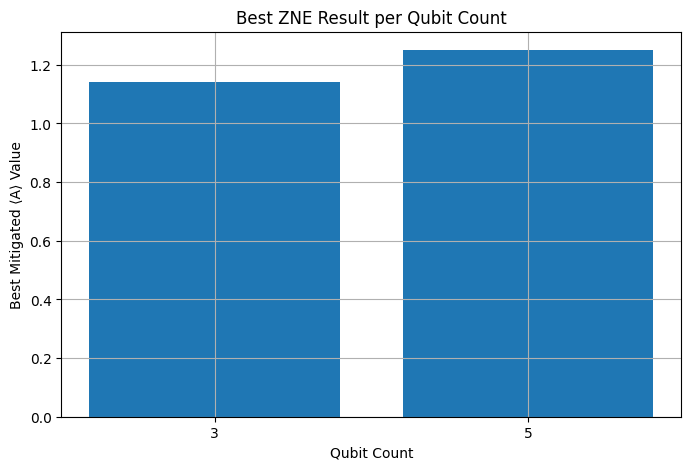

In [23]:
import pandas as pd

# Assuming df_results is already defined from your earlier ZNE experiment loop
# If not, load or define df_results before running this

# Group by qubit count and find row with max mitigated value per group
best_per_qubit = df_results.loc[df_results.groupby('n_qubits')['mitigated_value'].idxmax()]

# Optionally reset index if you want a cleaner DataFrame
best_per_qubit = best_per_qubit.reset_index(drop=True)

# Display the best result per qubit count
print("Best ZNE result for each qubit count:")
print(best_per_qubit)

# Optional: Save to CSV
best_per_qubit.to_csv("best_zne_per_qubit.csv", index=False)

# Optional: Plotting if you want a quick view
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(best_per_qubit['n_qubits'].astype(str), best_per_qubit['mitigated_value'])
plt.xlabel("Qubit Count")
plt.ylabel("Best Mitigated ⟨A⟩ Value")
plt.title("Best ZNE Result per Qubit Count")
plt.grid(True)
plt.show()


Ideal ⟨A⟩ for 5 qubits: 1.0000


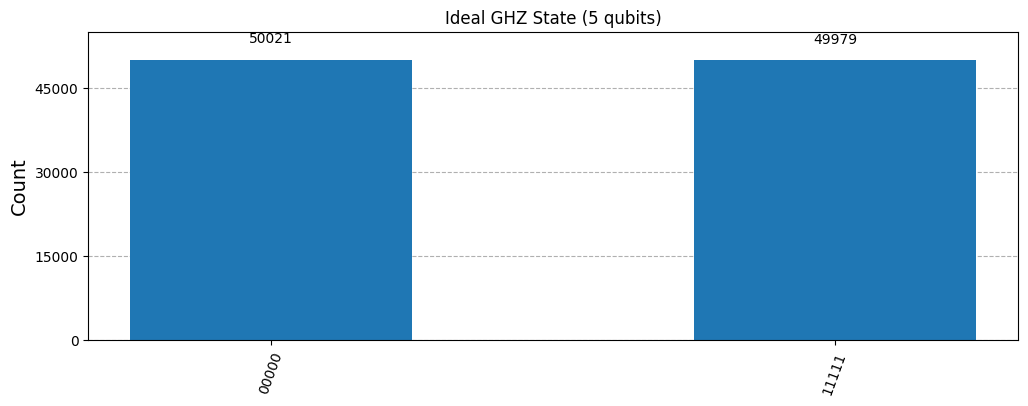

In [21]:
# Create ideal backend simulator
from qiskit_aer import AerSimulator

ideal_backend = AerSimulator()

# Ideal measurement
ideal_circuit = circuit.copy()
ideal_circuit.measure_all()

ideal_result = ideal_backend.run(ideal_circuit, shots=shots).result()
ideal_counts = ideal_result.get_counts(ideal_circuit)

ideal_expectation_value = (ideal_counts.get("0" * n_qubits, 0) + 
                           ideal_counts.get("1" * n_qubits, 0)) / shots

print(f"Ideal ⟨A⟩ for {n_qubits} qubits: {ideal_expectation_value:.4f}")
plot_histogram(ideal_counts, title=f"Ideal GHZ State ({n_qubits} qubits)", figsize=(12, 4))


,method,n_qubits,folding,factory,scale_factors,mitigated_value
0,ZNE,3,fold_global,RichardsonFactory,"[1.0, 2.0]",0.94563
1,ZNE,3,fold_global,LinearFactory,"[1.0, 2.0]",0.94859
2,ZNE,3,fold_global,PolyFactory,"[1.0, 2.0]",0.94588
3,ZNE,3,fold_all,RichardsonFactory,"[1.0, 2.0]",0.93416
4,ZNE,3,fold_all,LinearFactory,"[1.0, 2.0]",0.93876


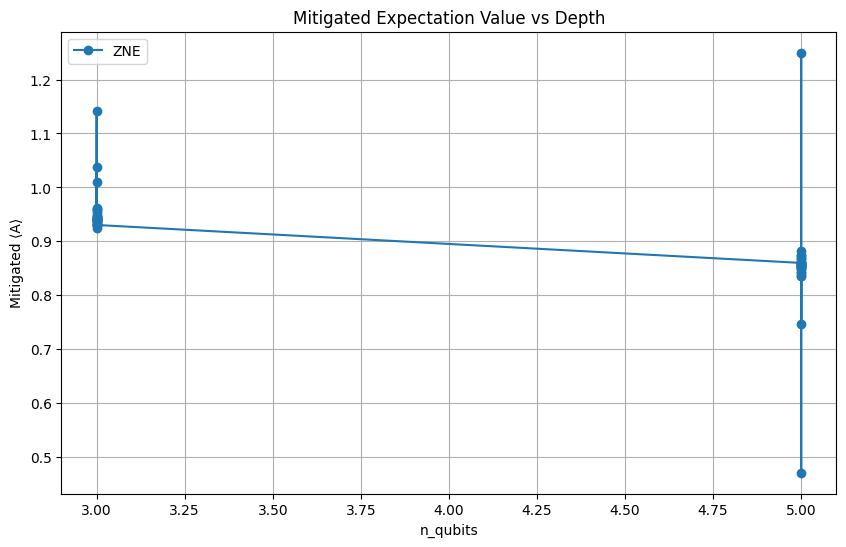

In [22]:
df = pd.DataFrame(results)
display(df.head())

plt.figure(figsize=(10, 6))
for method, group in df.groupby('method'):
    plt.plot(group['n_qubits'], group['mitigated_value'], 'o-', label=method)
plt.title('Mitigated Expectation Value vs Depth')
plt.xlabel('n_qubits')
plt.ylabel('Mitigated ⟨A⟩')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeJakartaV2 as FakeJakarta
from mitiq import zne
import matplotlib.pyplot as plt

# Setup
shots = 10 ** 5
noisy_backend = FakeJakarta()
ideal_backend = AerSimulator()

def execute(compiled_circuit):
    """Executes the input circuit and returns ⟨A⟩ = P(0...0) + P(1...1) on the noisy backend."""
    circuit_to_run = compiled_circuit.copy()
    circuit_to_run.measure_all()
    result = noisy_backend.run(circuit_to_run, shots=shots).result()
    counts = result.get_counts(circuit_to_run)
    return (counts.get("0" * compiled_circuit.num_qubits, 0) +
            counts.get("1" * compiled_circuit.num_qubits, 0)) / shots

def run_zne_demo(n_qubits=5):
    from mitiq.benchmarks import generate_ghz_circuit
    from mitiq.zne.inference import RichardsonFactory
    from mitiq.zne.scaling import fold_global

    print(f"\n### GHZ Expectation with {n_qubits} Qubits ###")

    # Generate GHZ
    circuit = generate_ghz_circuit(n_qubits=n_qubits, return_type="qiskit")
    compiled_circuit = transpile(circuit, noisy_backend)

    # Ideal backend
    ideal_circuit = circuit.copy()
    ideal_circuit.measure_all()
    ideal_result = ideal_backend.run(ideal_circuit, shots=shots).result()
    ideal_counts = ideal_result.get_counts(ideal_circuit)
    plot_histogram(ideal_counts, title="Counts for ideal GHZ")

    ideal_val = (ideal_counts.get("0" * n_qubits, 0) +
                 ideal_counts.get("1" * n_qubits, 0)) / shots
    print(f"Ideal ⟨A⟩ = {ideal_val:.4f}")

    # Noisy run
    noisy_val = execute(compiled_circuit)
    print(f"Noisy ⟨A⟩ = {noisy_val:.4f}")

    # Mitiq ZNE
    factory = RichardsonFactory(scale_factors=[1.0, 2.0, 3.0])
    folding_function = fold_global

    zne_val = zne.execute_with_zne(
        compiled_circuit,
        executor=execute,
        factory=factory,
        scale_noise=folding_function
    )

    print(f"Mitigated ⟨A⟩ = {zne_val:.4f}")
    print(f"Error without Mitiq = {abs(ideal_val - noisy_val):.4f}")
    print(f"Error with Mitiq    = {abs(ideal_val - zne_val):.4f}")
    
    factory.plot_fit()
    plt.show()



### GHZ Expectation with 7 Qubits ###
Ideal ⟨A⟩ = 1.0000
Noisy ⟨A⟩ = 0.7700
Mitigated ⟨A⟩ = 0.7926
Error without Mitiq = 0.2300
Error with Mitiq    = 0.2074


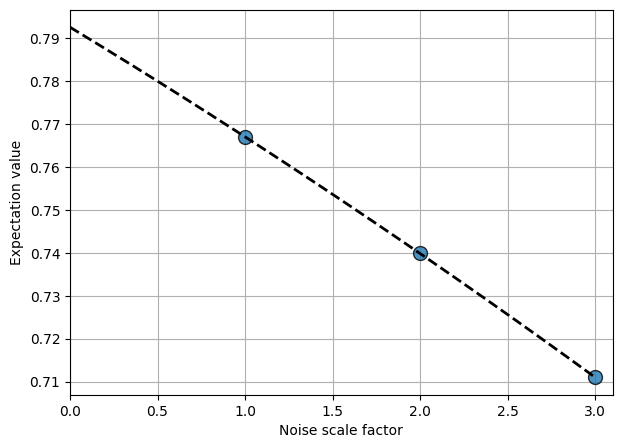

In [19]:
run_zne_demo(7)

,method,n_qubits,folding,factory,scale_factors,mitigated_value
0,ZNE,3,fold_global,RichardsonFactory,"[1.0, 2.0]",0.94563
1,ZNE,3,fold_global,LinearFactory,"[1.0, 2.0]",0.94859
2,ZNE,3,fold_global,PolyFactory,"[1.0, 2.0]",0.94588
3,ZNE,3,fold_all,RichardsonFactory,"[1.0, 2.0]",0.93416
4,ZNE,3,fold_all,LinearFactory,"[1.0, 2.0]",0.93876


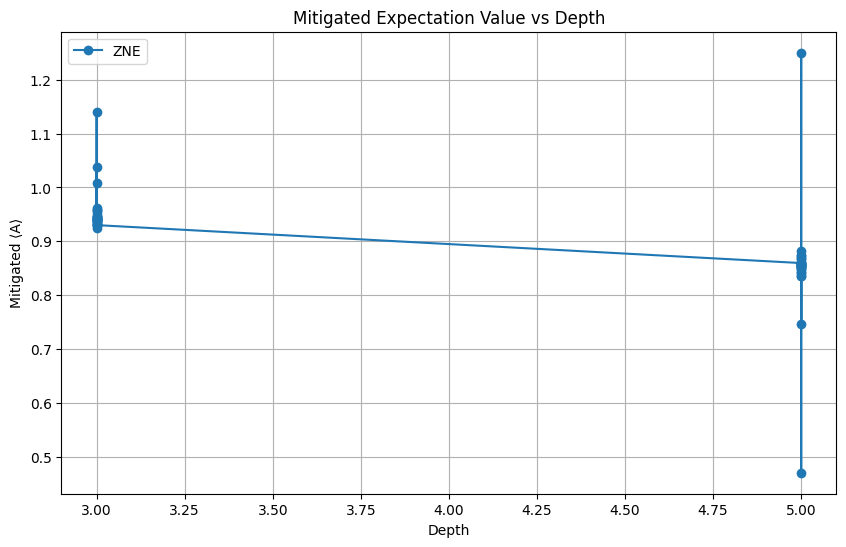

In [25]:
df = pd.DataFrame(results)
display(df.head())

plt.figure(figsize=(10, 6))
for method, group in df.groupby('method'):
    plt.plot(group['n_qubits'], group['mitigated_value'], 'o-', label=method)
plt.title('Mitigated Expectation Value vs Depth')
plt.xlabel('Depth')
plt.ylabel('Mitigated ⟨A⟩')
plt.legend()
plt.grid(True)
plt.show()

## Save Data

In [26]:
df.to_csv('mitigation_results.csv', index=False)